In [487]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
import warnings
from sklearn.datasets import fetch_openml
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config(display="diagram")




## Loading Data

In [415]:
df = pd.read_csv('austinHousingData.csv')

In [416]:
df.shape

(15171, 47)

In [417]:
pd.set_option('display.max_columns', None)

In [418]:
df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,True,True,True,False,False,Single Family,2,2012,305000.0,5,2019-09-02,9,2019,"Coldwell Banker United, Realtors - South Austin",39,0,5,2,1,3,0,1,0,6011.0,2601.0,1,0,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,True,True,True,False,False,Single Family,2,2013,295000.0,1,2020-10-13,10,2020,Agent Provided,29,0,1,2,0,0,0,0,0,6185.0,1768.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,True,False,True,False,False,Single Family,0,2018,256125.0,1,2019-07-31,7,2019,Agent Provided,2,0,4,1,0,1,0,0,0,7840.0,1478.0,0,2,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,True,True,True,False,False,Single Family,2,2013,240000.0,4,2018-08-08,8,2018,Agent Provided,9,0,0,2,0,0,0,0,0,6098.0,1678.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,True,False,True,False,False,Single Family,0,2002,239900.0,3,2018-10-31,10,2018,Agent Provided,27,0,0,1,0,0,0,0,0,6708.0,2132.0,1,0,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


## Visualization

In [419]:
sns_plt_pvy = sns.scatterplot(x=df['yearBuilt'],y=df['latestPrice'], hue=df['homeType'])
sns_plt_pvy.set_yscale("log") 

In [420]:
sns_plt_pva = sns.regplot(x=df['livingAreaSqFt'],y=df['latestPrice'],fit_reg=False)
sns_plt_pva.set_xscale("log")

<BarContainer object of 10 artists>

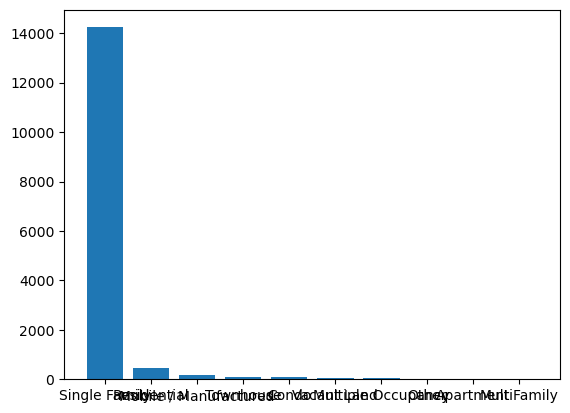

In [474]:
plt.bar(df['homeType'].unique(),df['homeType'].value_counts() )

array([[<Axes: title={'center': 'latestPrice'}>]], dtype=object)

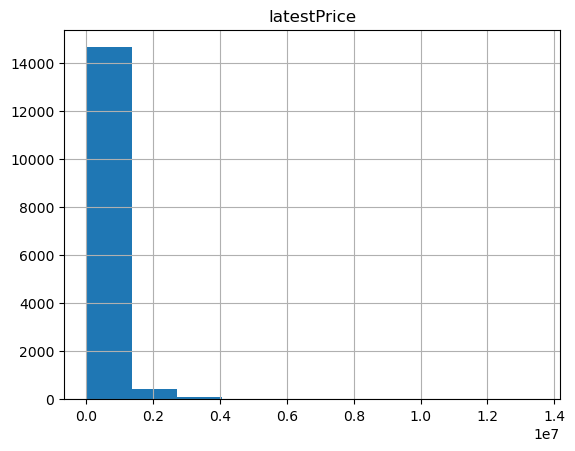

In [473]:
df.hist('latestPrice')

In [488]:
px.box(df3, x = 'latestPrice', color = 'homeType')

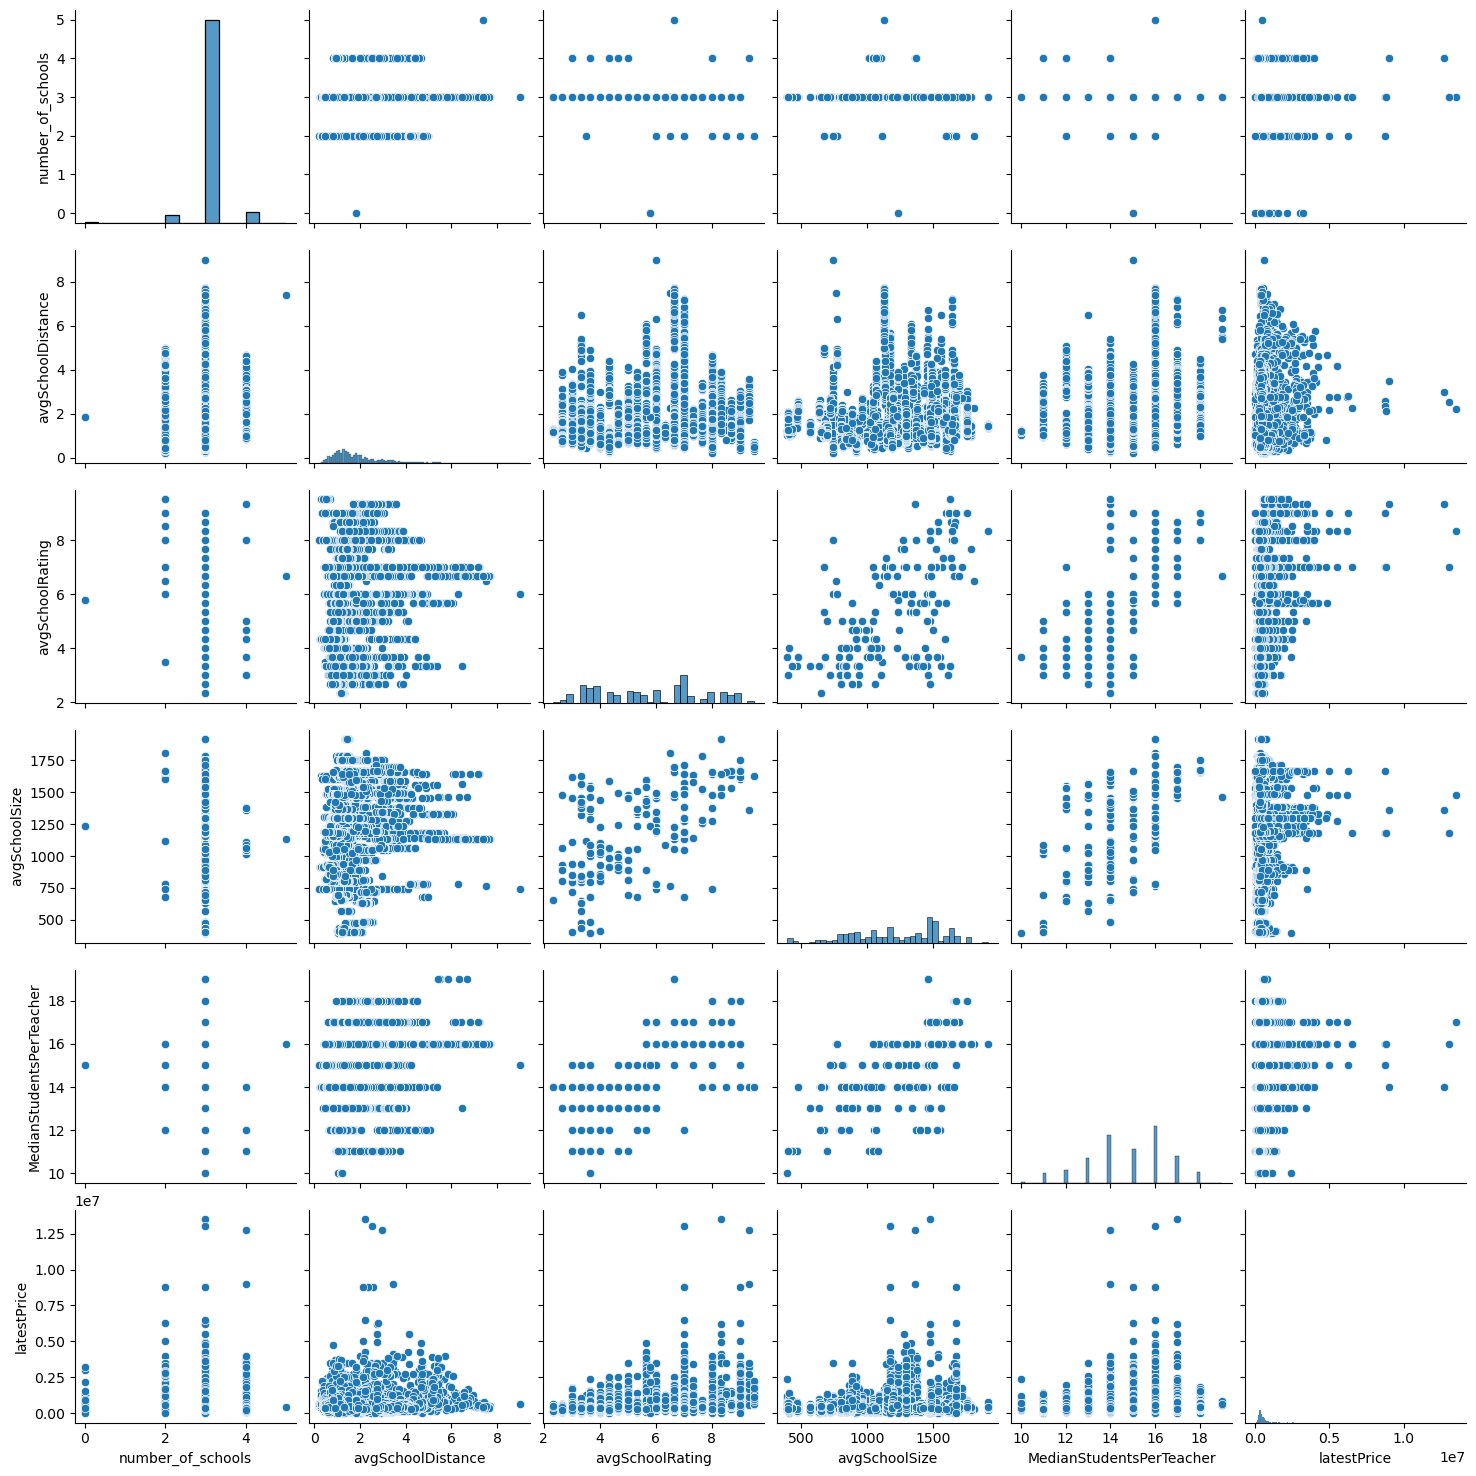

In [482]:
sns.pairplot(df1)#smpl_100[['numOfPrimarySchools','numOfElementarySchools','numOfMiddleSchools','numOfHighSchools','latestPrice']])

## ML Implemantation

##### Adding Column Number of Schools (Adds up the number of school)

In [422]:
df['number_of_schools'] = df['numOfPrimarySchools']+df['numOfElementarySchools']+df['numOfMiddleSchools']+df['numOfHighSchools']

#### Creating a new dataframe for [number_of_schools,number_of_schools,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher]

In [423]:
df1 = df[['number_of_schools','number_of_schools','avgSchoolRating','avgSchoolSize','MedianStudentsPerTeacher','latestPrice']]

In [424]:
df1.head()

,number_of_schools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,latestPrice
0,3,1.266667,2.666667,1063,14,305000.0
1,3,1.400000,2.666667,1063,14,295000.0
2,4,1.200000,3.000000,1108,14,256125.0
3,3,1.400000,2.666667,1063,14,240000.0
4,3,1.133333,4.000000,1223,14,239900.0


In [425]:
df1.describe()

,number_of_schools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,latestPrice
count,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04
mean,3.002637,1.838495,5.779912,1237.304660,14.857228,5.127677e+05
std,0.342149,1.068376,1.860276,326.513311,1.741857,4.531853e+05
min,0.000000,0.200000,2.333333,396.000000,10.000000,5.500000e+03
25%,3.000000,1.100000,4.000000,966.000000,14.000000,3.090000e+05
50%,3.000000,1.566667,5.778694,1287.000000,15.000000,4.050000e+05
75%,3.000000,2.266667,7.000000,1496.000000,16.000000,5.750000e+05
max,5.000000,9.000000,9.500000,1913.000000,19.000000,1.350000e+07


In [426]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number_of_schools         15171 non-null  int64  
 1   avgSchoolDistance         15171 non-null  float64
 2   avgSchoolRating           15171 non-null  float64
 3   avgSchoolSize             15171 non-null  int64  
 4   MedianStudentsPerTeacher  15171 non-null  int64  
 5   latestPrice               15171 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 711.3 KB


#### Separating Features and target feature

In [434]:
X = df1.drop('latestPrice',axis=1)
y = df1[['latestPrice']]
X.shape

(15171, 5)

#### Creating testing and training dataset

In [435]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


#### Storing training and dev dataset indicies

In [436]:
training_indicies = np.array(X_train.index)
dev_indicies = np.array(X_test.index)

In [437]:
X_train

,number_of_schools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher
1145,3,2.366667,2.666667,1478,13
8937,3,1.100000,2.666667,1063,14
14600,3,1.533333,7.333333,1142,15
13509,3,1.200000,9.000000,1755,18
733,4,1.866667,9.333333,1360,14
...,...,...,...,...,...
5191,3,1.333333,4.666667,887,14
13418,3,1.033333,4.666667,890,14
5390,3,5.233333,5.666667,1332,16
860,2,2.050000,9.000000,1669,15


### Ridge Regression

In [439]:
ridge_pipe = Pipeline([
    ("transformer", PolynomialFeatures(degree=3, include_bias=False)),
    ("scaler",StandardScaler()),
    ("ridge_model", Ridge())
])

ridge_pipe_params = {'ridge_model__copy_X': [True,False],
         'ridge_model__fit_intercept': [True,False],
         'ridge_model__alpha': np.linspace(0.001,1,100)}

ridge_pipe_grid=GridSearchCV(estimator = ridge_pipe,
                   param_grid=ridge_pipe_params,
                   scoring = "neg_mean_squared_error",
                   cv=[[training_indicies,dev_indicies]] )

In [440]:
ridge_pipe_grid.fit(X,y)

GridSearchCV(cv=[[array([ 1145,  8937, 14600, ...,  5390,   860,  7270]),
                  array([ 9876,  1730,  9869, ...,  9634, 14409, 11711])]],
             estimator=Pipeline(steps=[('transformer',
                                        PolynomialFeatures(degree=3,
                                                           include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('ridge_model', Ridge())]),
             param_grid={'ridge_model__alpha': array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.051454...
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
                         'ridge_model__copy_X': [True, False],
                         'ridge_model__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [441]:
ridge_pipe_grid_best_model = ridge_pipe_grid.best_estimator_
ridge_pipe_grid_best_model

Pipeline(steps=[('transformer',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('ridge_model', Ridge(alpha=0.011090909090909092))])

#### Extracting column names generated by the transformer

In [442]:
colms=pd.DataFrame(ridge_pipe_grid_best_model.named_steps["transformer"].fit_transform(X),columns = ridge_pipe_grid_best_model.named_steps["transformer"].get_feature_names_out())


In [484]:
pd.DataFrame(ridge_pipe_grid_best_model.named_steps["ridge_model"].coef_, columns=colms.columns)

,number_of_schools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,number_of_schools^2,number_of_schools avgSchoolDistance,number_of_schools avgSchoolRating,number_of_schools avgSchoolSize,number_of_schools MedianStudentsPerTeacher,avgSchoolDistance^2,avgSchoolDistance avgSchoolRating,avgSchoolDistance avgSchoolSize,avgSchoolDistance MedianStudentsPerTeacher,avgSchoolRating^2,avgSchoolRating avgSchoolSize,avgSchoolRating MedianStudentsPerTeacher,avgSchoolSize^2,avgSchoolSize MedianStudentsPerTeacher,MedianStudentsPerTeacher^2,number_of_schools^3,number_of_schools^2 avgSchoolDistance,number_of_schools^2 avgSchoolRating,number_of_schools^2 avgSchoolSize,number_of_schools^2 MedianStudentsPerTeacher,number_of_schools avgSchoolDistance^2,number_of_schools avgSchoolDistance avgSchoolRating,number_of_schools avgSchoolDistance avgSchoolSize,number_of_schools avgSchoolDistance MedianStudentsPerTeacher,number_of_schools avgSchoolRating^2,number_of_schools avgSchoolRating avgSchoolSize,number_of_schools avgSchoolRating MedianStudentsPerTeacher,number_of_schools avgSchoolSize^2,number_of_schools avgSchoolSize MedianStudentsPerTeacher,number_of_schools MedianStudentsPerTeacher^2,avgSchoolDistance^3,avgSchoolDistance^2 avgSchoolRating,avgSchoolDistance^2 avgSchoolSize,avgSchoolDistance^2 MedianStudentsPerTeacher,avgSchoolDistance avgSchoolRating^2,avgSchoolDistance avgSchoolRating avgSchoolSize,avgSchoolDistance avgSchoolRating MedianStudentsPerTeacher,avgSchoolDistance avgSchoolSize^2,avgSchoolDistance avgSchoolSize MedianStudentsPerTeacher,avgSchoolDistance MedianStudentsPerTeacher^2,avgSchoolRating^3,avgSchoolRating^2 avgSchoolSize,avgSchoolRating^2 MedianStudentsPerTeacher,avgSchoolRating avgSchoolSize^2,avgSchoolRating avgSchoolSize MedianStudentsPerTeacher,avgSchoolRating MedianStudentsPerTeacher^2,avgSchoolSize^3,avgSchoolSize^2 MedianStudentsPerTeacher,avgSchoolSize MedianStudentsPerTeacher^2,MedianStudentsPerTeacher^3
0,-1.435888e+06,-6.155937e+06,2.819042e+06,-2.038889e+06,-3.393414e+06,673914.234168,2.008902e+06,-4.387812e+06,-3.029672e+06,2.700224e+06,1.645397e+06,-1.461935e+06,4.185309e+06,7.405965e+06,913671.449153,-2.760206e+06,650938.599561,5.771629e+06,-282225.374414,2.272165e+06,512423.133226,1.977207e+06,2.711377e+06,4.693966e+06,-5.896812e+06,-1.030355e+06,818267.536351,-4.332251e+06,-2.399742e+06,1.154081e+06,-544265.070303,-2.842260e+06,-1.677017e+06,-315193.330144,8.089901e+06,-428914.763668,-953115.799481,343830.165673,789655.985611,998452.039981,256316.902377,-314861.497352,-222379.710213,-505669.712041,-2.404001e+06,-1.436786e+06,1.603361e+06,-1.996790e+06,-1.763871e+06,5.131019e+06,1.212751e+06,2.232701e+06,-9.533196e+06,6.117717e+06,-7.047826e+06


In [444]:
ridge_pipe_grid.cv_results_

{'mean_fit_time': array([0.03878188, 0.02030301, 0.01993012, 0.01871276, 0.02014422,
        0.01921988, 0.0200491 , 0.01908112, 0.02041602, 0.01913404,
        0.02010489, 0.01876998, 0.02033997, 0.0198431 , 0.02016306,
        0.01934505, 0.02095604, 0.01975703, 0.02062511, 0.01927781,
        0.02037382, 0.01922512, 0.02027583, 0.0194912 , 0.02038288,
        0.01992321, 0.02065396, 0.01911902, 0.02089405, 0.01919889,
        0.01988602, 0.02052188, 0.02124715, 0.01914811, 0.0199852 ,
        0.01956701, 0.021209  , 0.01934576, 0.02513885, 0.02396393,
        0.0316751 , 0.03127694, 0.04283071, 0.03208089, 0.03119421,
        0.02186394, 0.02388191, 0.02407813, 0.02572393, 0.0248282 ,
        0.02456999, 0.02218199, 0.02591681, 0.02547312, 0.02558374,
        0.0261569 , 0.02660298, 0.026263  , 0.02556586, 0.02383828,
        0.02692389, 0.02590489, 0.02690506, 0.02778864, 0.02969003,
        0.02746701, 0.02683425, 0.0255661 , 0.02853823, 0.0268271 ,
        0.02780175, 0.0272212 ,

#### Best Score for Ridge Regression

In [445]:
ridge_pipe_grid.best_score_

-248491804018.89548

### Lasso Regression

In [446]:
lasso_pipe = Pipeline([
    ("scaler",StandardScaler()),
    ("lasso_model", Lasso())
])

lasso_pipe_params = {'lasso_model__copy_X': [True,False],
         'lasso_model__fit_intercept': [True,False],
         'lasso_model__alpha': np.linspace(0.001,1,100)}

lasso_pipe_grid = GridSearchCV(estimator = lasso_pipe,
                   param_grid=pipe2_params,
                   scoring = "neg_mean_squared_error",
                   cv=[[training_indicies,dev_indicies]] )


In [447]:
lasso_pipe_grid.fit(X,y)

GridSearchCV(cv=[[array([ 1145,  8937, 14600, ...,  5390,   860,  7270]),
                  array([ 9876,  1730,  9869, ...,  9634, 14409, 11711])]],
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso_model', Lasso())]),
             param_grid={'lasso_model__alpha': array([  0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,   0.9,
         1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,   1.8,
         1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,   2.7,
         2.8,   2.9,   3. ,   3.1,   3...
        94.6,  94.7,  94.8,  94.9,  95. ,  95.1,  95.2,  95.3,  95.4,
        95.5,  95.6,  95.7,  95.8,  95.9,  96. ,  96.1,  96.2,  96.3,
        96.4,  96.5,  96.6,  96.7,  96.8,  96.9,  97. ,  97.1,  97.2,
        97.3,  97.4,  97.5,  97.6,  97.7,  97.8,  97.9,  98. ,  98.1,
        98.2,  98.3,  98.4,  98.5,  98.6,  98.7,  98.8,  98.9,  99. ,
        99.1,  99.2,  99.3,  99.4,  99.5,  99.6,  99.7,  99.8,  99.9,
       100. ]),
                         'lasso_model__copy_X': [True, False],
                         'lasso_model__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [448]:
lasso_pipe_grid_best_model = lasso_pipe_grid.best_estimator_
lasso_pipe_grid_best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso_model', Lasso(alpha=0.1))])

In [449]:
lasso_pipe_grid_best_model.named_steps["lasso_model"].coef_

array([-16283.92355984,  32877.27100115, 168633.5610895 , -72271.09947355,
         3165.17495634])

In [450]:
lasso_pipe_grid.cv_results_

{'mean_fit_time': array([0.0121038 , 0.01199985, 0.01178503, ..., 0.00643206, 0.00638604,
        0.00623226]),
 'std_fit_time': array([0., 0., 0., ..., 0., 0., 0.]),
 'mean_score_time': array([0.00372624, 0.00389695, 0.00393987, ..., 0.00256181, 0.00254893,
        0.00255203]),
 'std_score_time': array([0., 0., 0., ..., 0., 0., 0.]),
 'param_lasso_model__alpha': masked_array(data=[0.1, 0.1, 0.1, ..., 100.0, 100.0, 100.0],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_lasso_model__copy_X': masked_array(data=[True, True, False, ..., True, False, False],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_lasso_model__fit_intercept': masked_array(data=[True, False, True, ..., False, True, False],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'las

#### Best Score for Lasso regression

In [451]:
lasso_pipe_grid.best_score_

-277945388152.78815

### Linear Regression

In [452]:
linear_pipe = Pipeline([
    ("transformer", PolynomialFeatures(degree=3, include_bias=False)),
    ("scaler",StandardScaler()),
    ("linreg_model", LinearRegression())
])

linear_pipe_params = {'linreg_model__copy_X': [True,False],
         'linreg_model__fit_intercept': [True,False]}

linear_pipe_grid = GridSearchCV(estimator = linear_pipe,
                   param_grid=linear_pipe_params,
                   scoring = "neg_mean_squared_error",
                   cv=[[training_indicies,dev_indicies]] )


In [453]:
linear_pipe_grid.fit(X,y)

GridSearchCV(cv=[[array([ 1145,  8937, 14600, ...,  5390,   860,  7270]),
                  array([ 9876,  1730,  9869, ...,  9634, 14409, 11711])]],
             estimator=Pipeline(steps=[('transformer',
                                        PolynomialFeatures(degree=3,
                                                           include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('linreg_model', LinearRegression())]),
             param_grid={'linreg_model__copy_X': [True, False],
                         'linreg_model__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [454]:
linear_pipe_grid_best_model = linear_pipe_grid.best_estimator_
linear_pipe_grid_best_model

Pipeline(steps=[('transformer',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('linreg_model', LinearRegression())])

In [455]:
linear_pipe_grid.cv_results_

{'mean_fit_time': array([0.06486416, 0.04984188, 0.05845618, 0.04473805]),
 'std_fit_time': array([0., 0., 0., 0.]),
 'mean_score_time': array([0.01044703, 0.009202  , 0.00820494, 0.00690699]),
 'std_score_time': array([0., 0., 0., 0.]),
 'param_linreg_model__copy_X': masked_array(data=[True, True, False, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_linreg_model__fit_intercept': masked_array(data=[True, False, True, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'linreg_model__copy_X': True,
   'linreg_model__fit_intercept': True},
  {'linreg_model__copy_X': True, 'linreg_model__fit_intercept': False},
  {'linreg_model__copy_X': False, 'linreg_model__fit_intercept': True},
  {'linreg_model__copy_X': False, 'linreg_model__fit_intercept': False}],
 'split0_test_score': array([-2.49024509e+11, -5.19042219e+11, -2.49024509e+11, -5.19042219e+11])

#### Best Score for Linear Regression

In [456]:
linear_pipe_grid.best_score_

-249024508592.69778